# Assignment 3 — 3D Regression Visualization for House Prices

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn-v0_8-whitegrid')

In [10]:
# Load the dataset (created alongside this notebook)
df = pd.read_csv('https://raw.githubusercontent.com/bijayam/GenAI-Application-Developer-Assignment-L3/refs/heads/main/house_price_dataset.csv')
df.head()

,Area (sq ft),Bedrooms,House Price
0,2457.494517,5,9.814049e+06
1,1653.308255,4,6.939227e+06
2,2660.635008,2,8.931510e+06
3,2273.683270,5,9.351562e+06
4,826.025635,3,4.272375e+06


In [11]:
X = df[['Area (sq ft)', 'Bedrooms']]
y = df['House Price']
reg = LinearRegression().fit(X, y)
print('Intercept:', reg.intercept_)
print('Coefficients [Area, Bedrooms]:', reg.coef_)

Intercept: 23762.014006524347
Coefficients [Area, Bedrooms]: [  2985.96041834 502471.32355613]


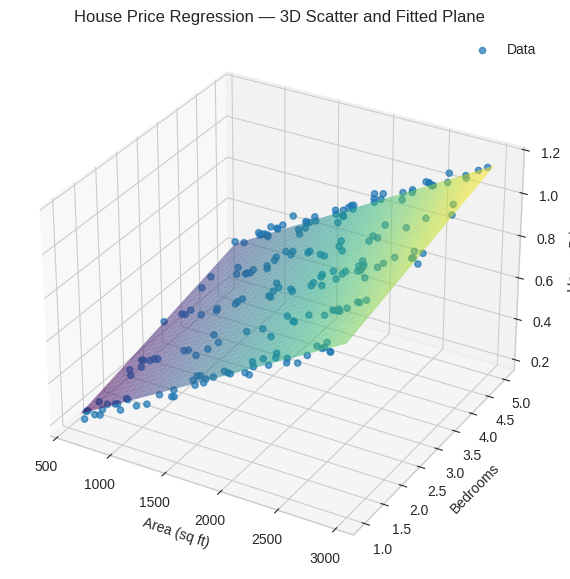

In [12]:
# 3D scatter + regression plane
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Area (sq ft)'], df['Bedrooms'], df['House Price'], c='tab:blue', alpha=0.7, label='Data')

area_grid = np.linspace(df['Area (sq ft)'].min(), df['Area (sq ft)'].max(), 35)
bed_grid = np.linspace(df['Bedrooms'].min(), df['Bedrooms'].max(), 35)
AA, BB = np.meshgrid(area_grid, bed_grid)
ZZ = reg.predict(pd.DataFrame({'Area (sq ft)': AA.ravel(), 'Bedrooms': BB.ravel()})).reshape(AA.shape)
ax.plot_surface(AA, BB, ZZ, cmap=cm.viridis, alpha=0.55, linewidth=0, antialiased=True)

ax.set_xlabel('Area (sq ft)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('House Price')
ax.set_title('House Price Regression — 3D Scatter and Fitted Plane')
ax.legend()
plt.show()